# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [3]:
print(df.head())

     data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0  2015-01-01    F             False             True           1   
1  2015-01-01    M              True             True           0   
2  2015-01-01    M              True             True           2   
3  2015-01-01    F              True            False           0   
4  2015-01-01    M             False            False           0   

    tipo_renda           educacao estado_civil tipo_residencia  idade  \
0  Assalariado         Secundário       Casado            Casa     36   
1   Empresário         Secundário       Casado            Casa     42   
2  Assalariado  Superior completo       Casado            Casa     31   
3   Empresário         Secundário       Casado            Casa     50   
4  Assalariado         Secundário       Casado            Casa     52   

   tempo_emprego  qt_pessoas_residencia    mau    renda  
0       3.575342                    3.0  False  3369.24  
1       0.860274              

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\caiof\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


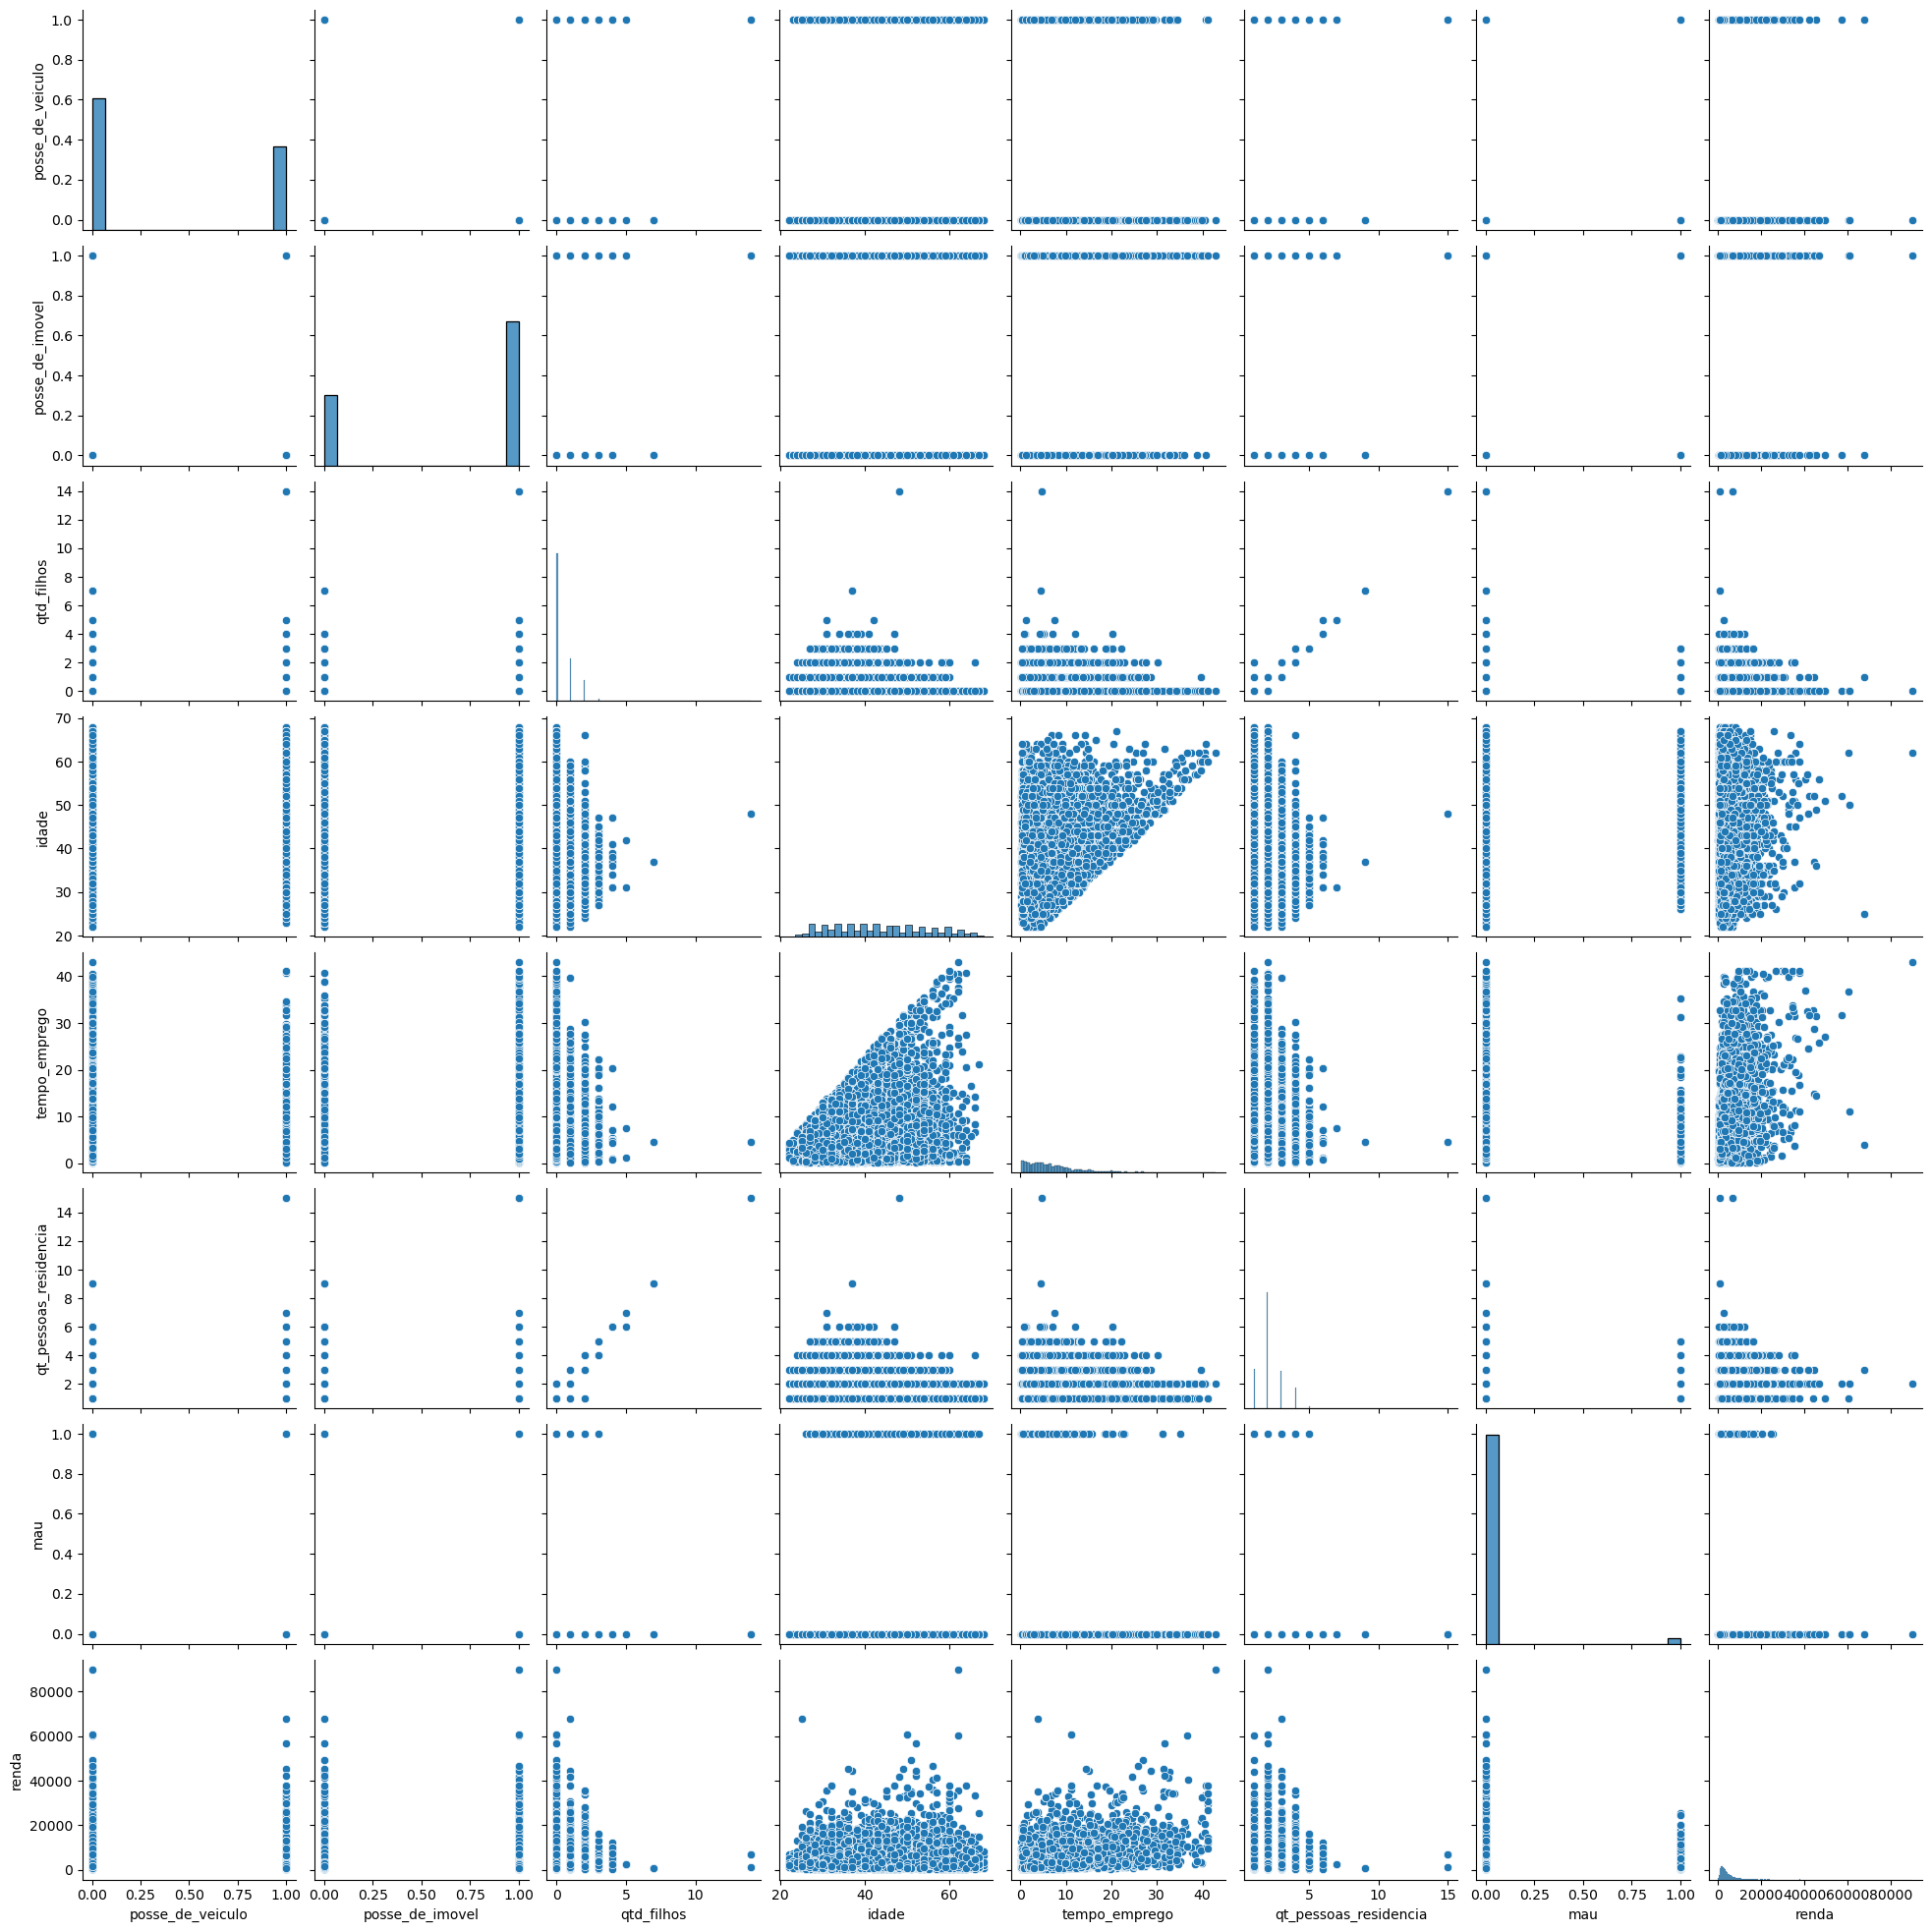

In [4]:
#Avaliando as relações entre as variáveis 
sns.pairplot(df)
plt.show()

In [5]:
df_numerico = df.select_dtypes(include=[np.number])
df_numerico.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


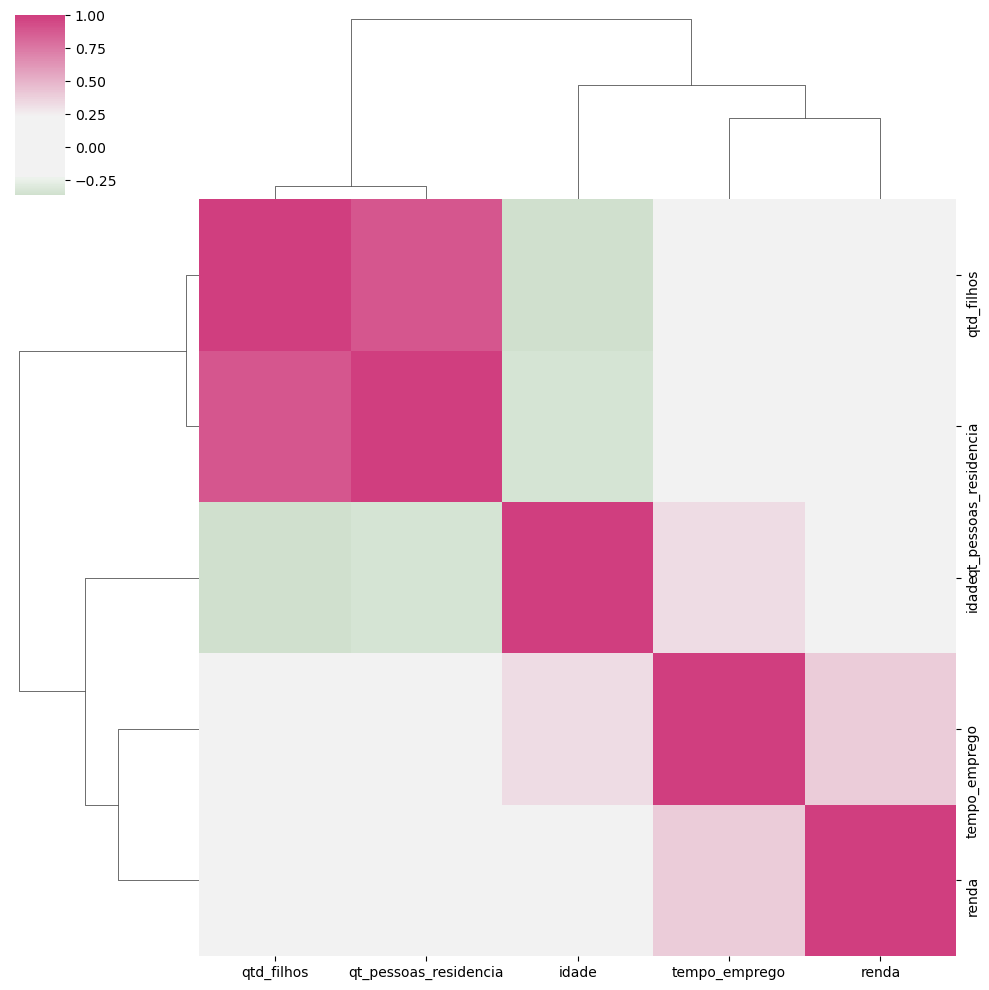

In [6]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df_numerico.corr(), figsize=(10, 10), center = 0, cmap=cmap)


Reposta:

Ao analisar as relações das variaveis percebemos alguns padrões que não fazem muito sentido estar se aprofundando para estudar os padroões, entre elas, são (qtd_filhos com qtd_pessoas_residencia), mas não faz sentido fazer um estudo aprofundado quanto a essa relação por ser óbvio que quando uma pessoa tem filho mais pessoas mora com ela, a outra relação é a (idade e tempo_emprego) faz muito sentido, uma pessoa com mais tempo de vida ela terá mais tempo trabalhado e outra que podemos relacionar também é (renda e tempo_emprego), porem essa correlação é mais fraca para ser analisada.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

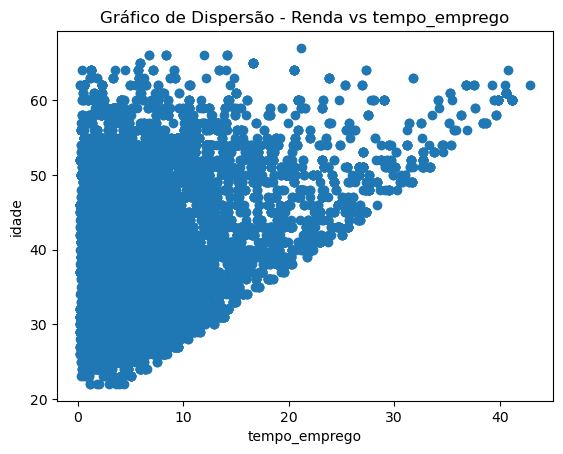

In [7]:
var1 = df_numerico.corr()["renda"].sort_values(ascending=False).index[1]
var2 = df_numerico.corr()["renda"].sort_values(ascending=False).index[2]

plt.scatter(df[var1], df[var2])
plt.xlabel(var1)
plt.ylabel(var2)
plt.title("Gráfico de Dispersão - Renda vs " + var1)
plt.show()

3) Na sua opinião, há outliers na variável renda?

In [8]:
desc_stats = df['renda'].describe()

print(desc_stats)

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64


Há outliers na variável renda sim, podemos observar que há uma grande diferença entre o valor mínimo e a média ou então podemos dizer que o valor máximo está muito longe do valor mínimo, por conta disso podemos afirmar que existe sim outliers na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [11]:
df["renda_log"] = np.log(df["renda"])

In [13]:
# Calculando o logaritmo da variável "renda"
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix["renda_log"])


qtd_filhos               0.023814
idade                    0.024713
tempo_emprego            0.379437
qt_pessoas_residencia    0.036338
renda                    0.835708
renda_log                1.000000
Name: renda_log, dtype: float64


C:\Users\caiof\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


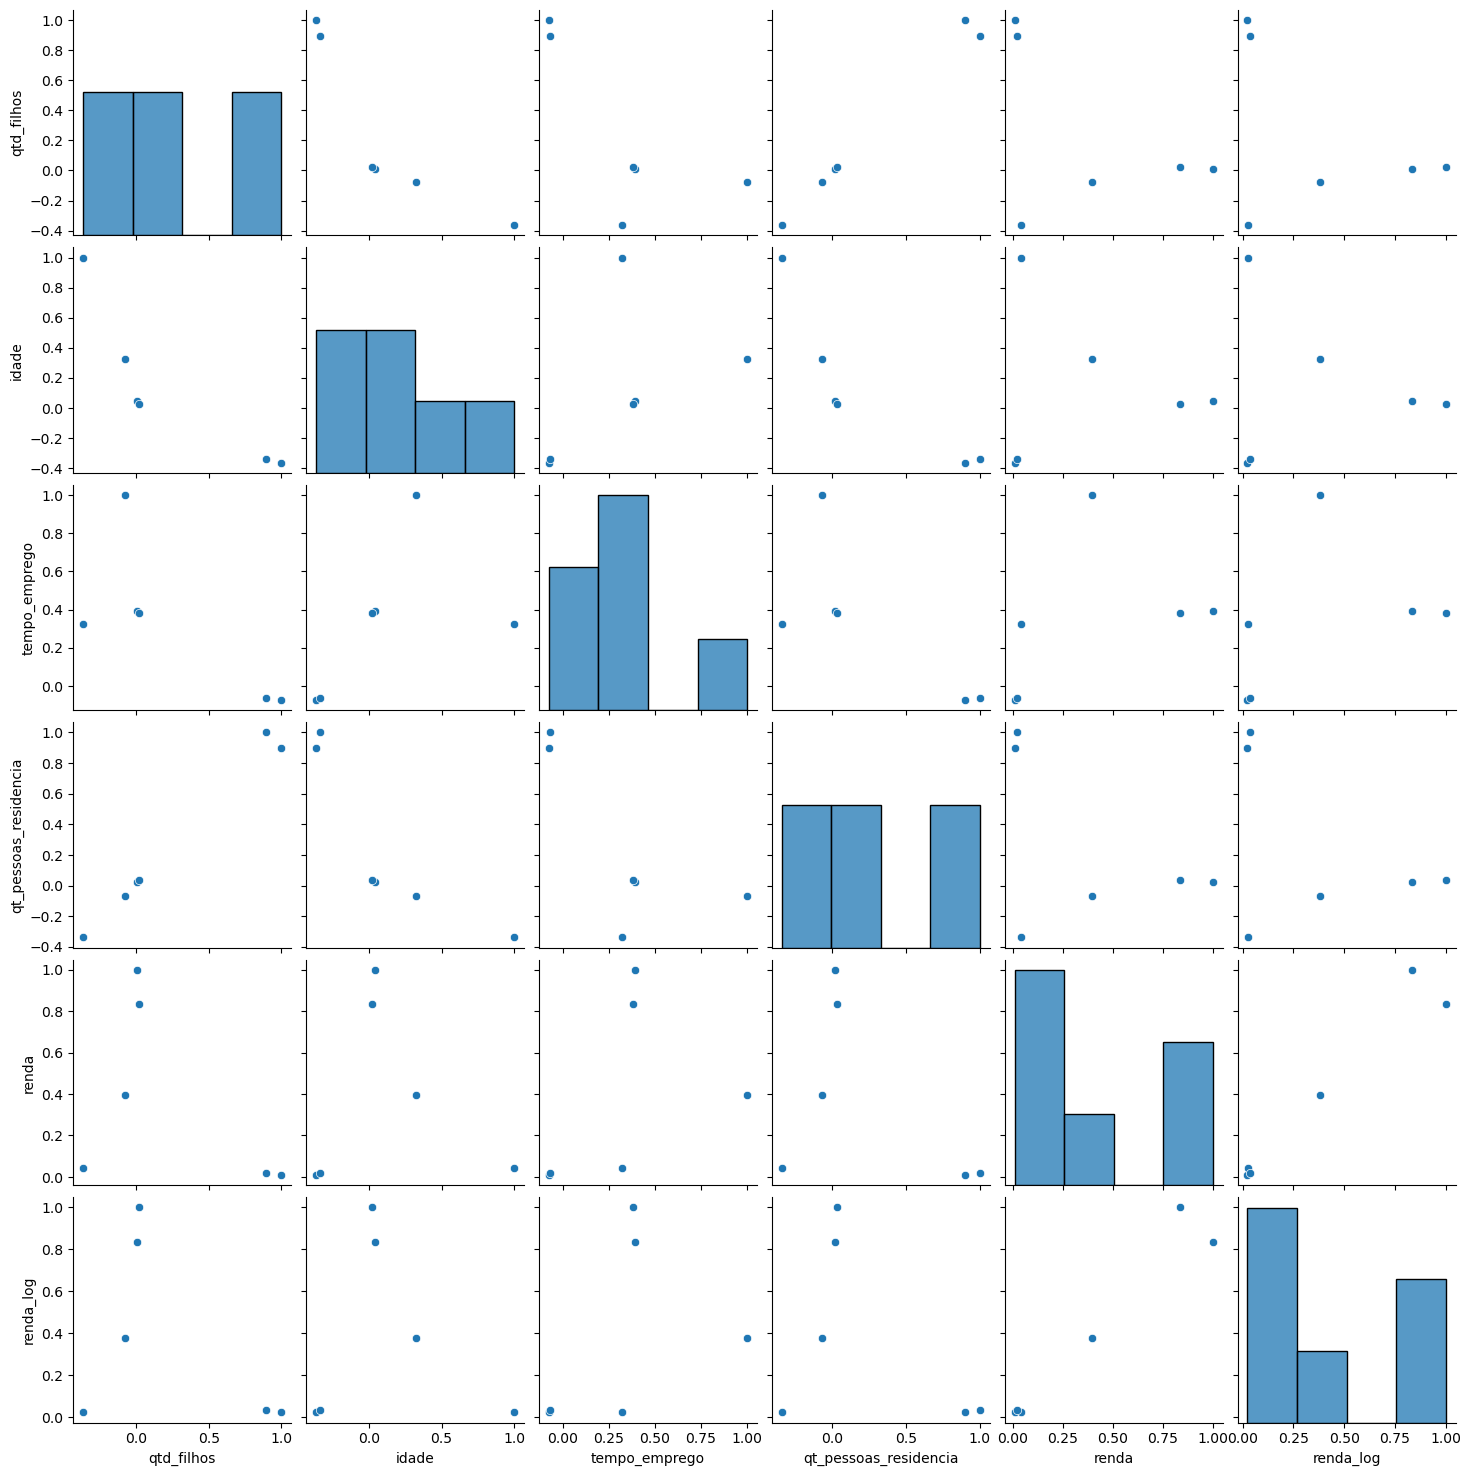

In [14]:
sns.pairplot(correlation_matrix)
plt.show()

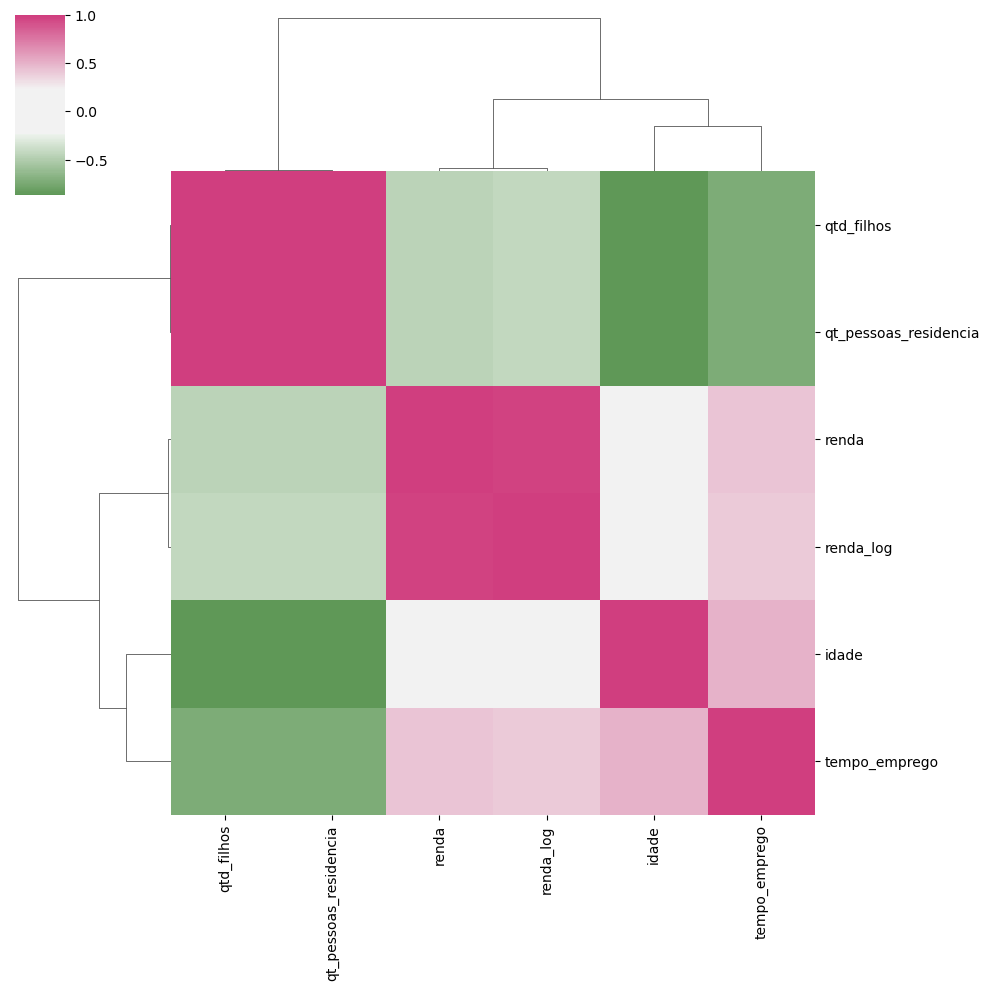

In [15]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(correlation_matrix.corr(), figsize=(10, 10), center = 0, cmap=cmap)


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Não houve grandes mudanças, mas parece que piorou